<a href="https://colab.research.google.com/github/Pragya-code/Mini_Project/blob/main/2505496_PragyaRajbanshi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student Name: Pragya Rajbanshi

Group: L5CG3

University ID: 2505496

Concepts and Technologies of AI

Mini Project - Classification


Classification Task

Shape: (480, 17)


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M



Columns:
['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

Missing values per column:


,MissingCount
gender,0
NationalITy,0
PlaceofBirth,0
StageID,0
GradeID,0
SectionID,0
Topic,0
Semester,0
Relation,0
raisedhands,0



Duplicate rows: 2

Missing values after fillna:


,MissingCount
gender,0
NationalITy,0
PlaceofBirth,0
StageID,0
GradeID,0
SectionID,0
Topic,0
Semester,0
Relation,0
raisedhands,0



Target distribution (Semester):


,Count
Semester,
F,245
S,235


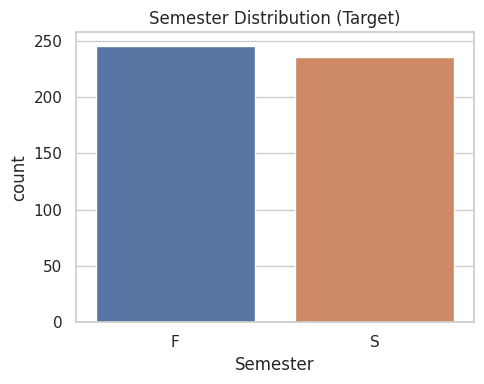

Insight: checks if the target classes are balanced or imbalanced.


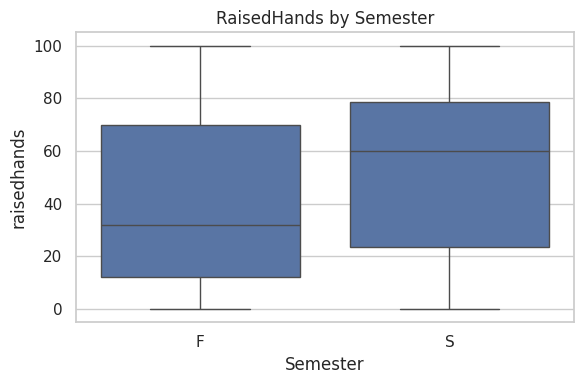

Insight: compares engagement (raisedhands) between F and S.


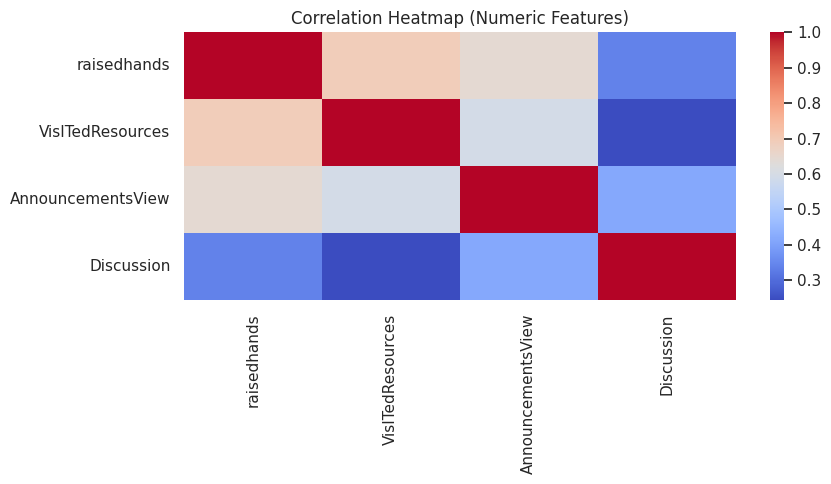

Insight: shows relationships among numeric engagement features.


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

# Load dataset
path_cls = "/content/drive/MyDrive/Mini_Project/xAPI-Edu-Data.csv"
df = pd.read_csv(path_cls)
df.columns = df.columns.str.strip()

print("Shape:", df.shape)
display(df.head())

# Check missing values and duplicates
print("\nColumns:")
print(df.columns.tolist())

print("\nMissing values per column:")
display(df.isnull().sum().to_frame("MissingCount"))

print("\nDuplicate rows:", df.duplicated().sum())

# Handle missing values using simple fillna (numeric->median, categorical->mode)
num_cols = df.select_dtypes(include=["int64","float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

print("\nMissing values after fillna:")
display(df.isnull().sum().to_frame("MissingCount"))

# Target distribution
target = "Semester"
print("\nTarget distribution (Semester):")
display(df[target].value_counts().to_frame("Count"))

plt.figure(figsize=(5,4))
sns.countplot(x=target, data=df, hue=target, legend=False)
plt.title("Semester Distribution (Target)")
plt.tight_layout()
plt.show()
print("Insight: checks if the target classes are balanced or imbalanced.")

# EDA plots
if "raisedhands" in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=target, y="raisedhands", data=df)
    plt.title("RaisedHands by Semester")
    plt.tight_layout()
    plt.show()
    print("Insight: compares engagement (raisedhands) between F and S.")

plt.figure(figsize=(9,5))
sns.heatmap(df.select_dtypes(include=["int64","float64"]).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()
print("Insight: shows relationships among numeric engagement features.")

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.neural_network import MLPClassifier

# 7 baseline classical models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB



# Split features/target
X = df.drop(columns=[target])
y = df[target]

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features (helps LR, SVM, KNN, MLP)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

def eval_cls(model, name):
    model.fit(X_train_sc, y_train)
    pred = model.predict(X_test_sc)
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, pred),
        "Precision(macro)": precision_score(y_test, pred, average="macro", zero_division=0),
        "Recall(macro)": recall_score(y_test, pred, average="macro", zero_division=0),
        "F1(macro)": f1_score(y_test, pred, average="macro", zero_division=0)
    }

# Neural network model (MLPClassifier)
mlp = MLPClassifier(hidden_layer_sizes=(64,32), activation="relu",
                    solver="adam", max_iter=1000, random_state=42)

mlp.fit(X_train_sc, y_train)
mlp_pred = mlp.predict(X_test_sc)

print("Neural Network (MLPClassifier) - Test Report:")
print(classification_report(y_test, mlp_pred, zero_division=0))

# 7 baseline models
models = {
    "LogisticRegression": LogisticRegression(max_iter=2000, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "SVC(RBF)": SVC(kernel="rbf", C=1.0, gamma="scale"),
    "GaussianNB": GaussianNB()
}

baseline_results = [eval_cls(m, name) for name, m in models.items()]
baseline_df = pd.DataFrame(baseline_results).sort_values("F1(macro)", ascending=False)

print("\nBaseline Comparison (7 models) sorted by F1(macro):")
display(baseline_df)

Neural Network (MLPClassifier) - Test Report:
              precision    recall  f1-score   support

           F       0.50      0.57      0.53        49
           S       0.47      0.40      0.44        47

    accuracy                           0.49        96
   macro avg       0.49      0.49      0.49        96
weighted avg       0.49      0.49      0.49        96


Baseline Comparison (7 models) sorted by F1(macro):


,Model,Accuracy,Precision(macro),Recall(macro),F1(macro)
6,GaussianNB,0.697917,0.756593,0.702779,0.682735
1,DecisionTree,0.645833,0.658009,0.642640,0.635714
0,LogisticRegression,0.635417,0.636243,0.634173,0.633468
3,GradientBoosting,0.625000,0.624837,0.624403,0.624348
5,SVC(RBF),0.583333,0.583152,0.583152,0.583152
4,KNN,0.531250,0.530399,0.529092,0.525014
2,RandomForest,0.510417,0.509259,0.509119,0.507800


In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Hyperparameter tuning: Logistic Regression
lr = LogisticRegression(max_iter=3000, random_state=42)
grid_lr = GridSearchCV(
    lr,
    param_grid={"C":[0.01, 0.1, 1, 10, 50]},
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)
grid_lr.fit(X_train_sc, y_train)

print("Best LR params:", grid_lr.best_params_)
print("Best LR CV F1(macro):", grid_lr.best_score_)

# Hyperparameter tuning: Random Forest
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(
    rf,
    param_grid={
        "n_estimators":[200, 400],
        "max_depth":[None, 5, 10],
        "min_samples_split":[2, 5],
        "min_samples_leaf":[1, 2]
    },
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)
grid_rf.fit(X_train_sc, y_train)

print("\nBest RF params:", grid_rf.best_params_)
print("Best RF CV F1(macro):", grid_rf.best_score_)

# Feature selection
k = 10
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_fs = selector.fit_transform(X_train_sc, y_train)
X_test_fs  = selector.transform(X_test_sc)

selected_idx = selector.get_support(indices=True)
selected_features = X.columns[selected_idx]
print(f"\nSelected features (Top {k}):")
print(list(selected_features))

# Final models: best hyperparameters + selected features
final_lr = LogisticRegression(max_iter=3000, random_state=42, **grid_lr.best_params_)
final_rf = RandomForestClassifier(random_state=42, **grid_rf.best_params_)

final_lr.fit(X_train_fs, y_train)
pred_lr = final_lr.predict(X_test_fs)

final_rf.fit(X_train_fs, y_train)
pred_rf = final_rf.predict(X_test_fs)

def final_row(name, pred, cv_score):
    return {
        "Model": name,
        "Features": f"Selected ({k})",
        "CV Score": round(cv_score, 4),
        "Accuracy": round(accuracy_score(y_test, pred), 4),
        "Precision": round(precision_score(y_test, pred, average="macro", zero_division=0), 4),
        "Recall": round(recall_score(y_test, pred, average="macro", zero_division=0), 4),
        "F1-Score": round(f1_score(y_test, pred, average="macro", zero_division=0), 4),
    }

final_table_cls = pd.DataFrame([
    final_row("Final Logistic Regression", pred_lr, grid_lr.best_score_),
    final_row("Final Random Forest", pred_rf, grid_rf.best_score_)
])

print("\nFinal Comparison Table (Classification):")
display(final_table_cls)

Best LR params: {'C': 0.01}
Best LR CV F1(macro): 0.6557567123083445

Best RF params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best RF CV F1(macro): 0.6844566132766048

Selected features (Top 10):
['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'PlaceofBirth_Palestine', 'PlaceofBirth_lebanon', 'PlaceofBirth_venzuela', 'Topic_IT', 'Topic_Math', 'ParentschoolSatisfaction_Good']

Final Comparison Table (Classification):


,Model,Features,CV Score,Accuracy,Precision,Recall,F1-Score
0,Final Logistic Regression,Selected (10),0.6558,0.6667,0.6696,0.6678,0.6661
1,Final Random Forest,Selected (10),0.6845,0.6771,0.7031,0.6806,0.6690
